In [67]:
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
from matplotlib import style
import mplfinance as mpf 
import pandas_datareader.data as web 
from pandas_datareader import data as web
import pandas as pd
import pickle
import bs4 as bs
import requests
import os

<IPython.core.display.Javascript object>


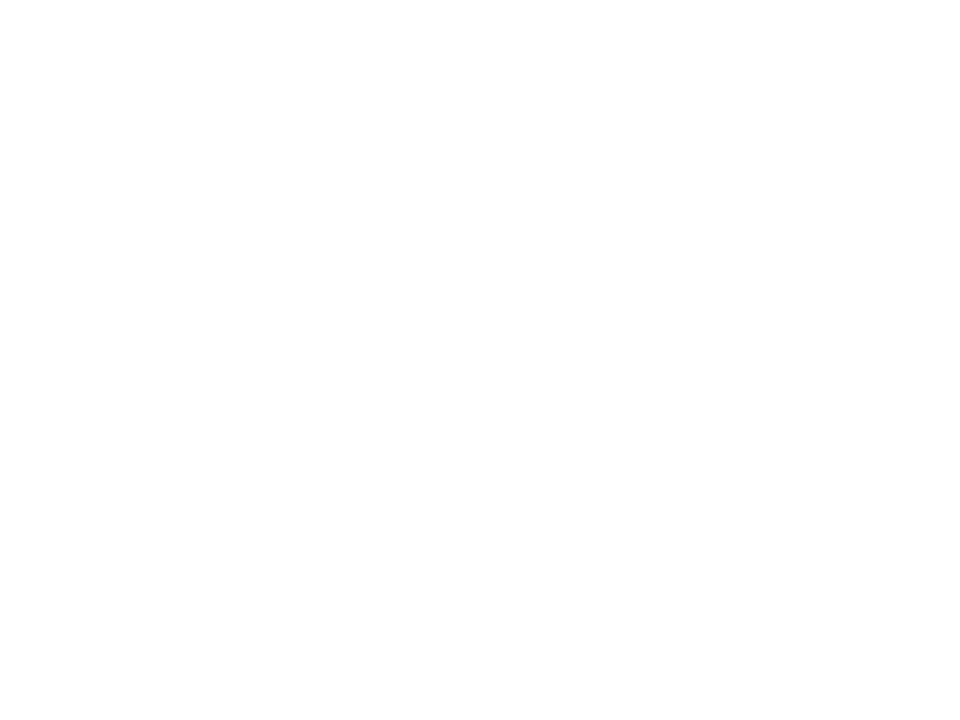

In [2]:
style.use('dark_background')
start=dt.datetime(2010, 1, 1)
end=dt.datetime(2016,12,31)
pf=web.DataReader('TSLA','yahoo',start,end)
#pf.to_csv('tsla.csv')
df=pd.read_csv('tsla.csv',parse_dates=True,index_col=0)
df.plot()


In [3]:
df['50mov_avr']=df['Adj Close'].rolling(100,min_periods=0).mean()#to smooth out short-term fluctuations in time series data and highlight long-term trends

<IPython.core.display.Javascript object>


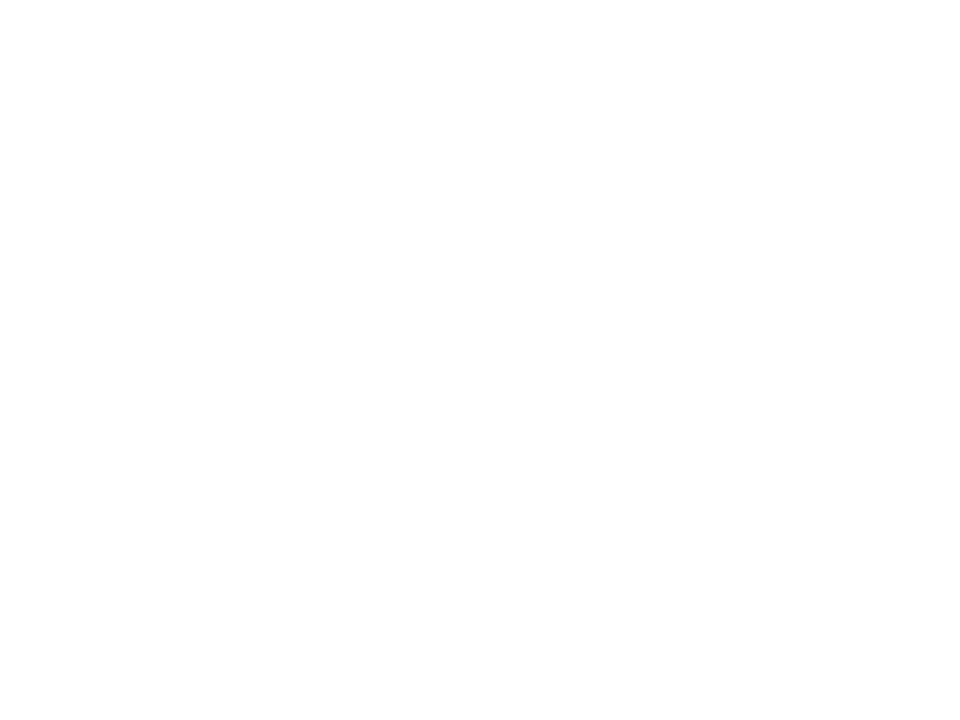

In [4]:
df['50mov_avr'].plot()
df['Adj Close'].plot()
df.plot()

In [5]:
df['50mov_avr']=df['Adj Close'].resample('10D').ohlc()

<IPython.core.display.Javascript object>


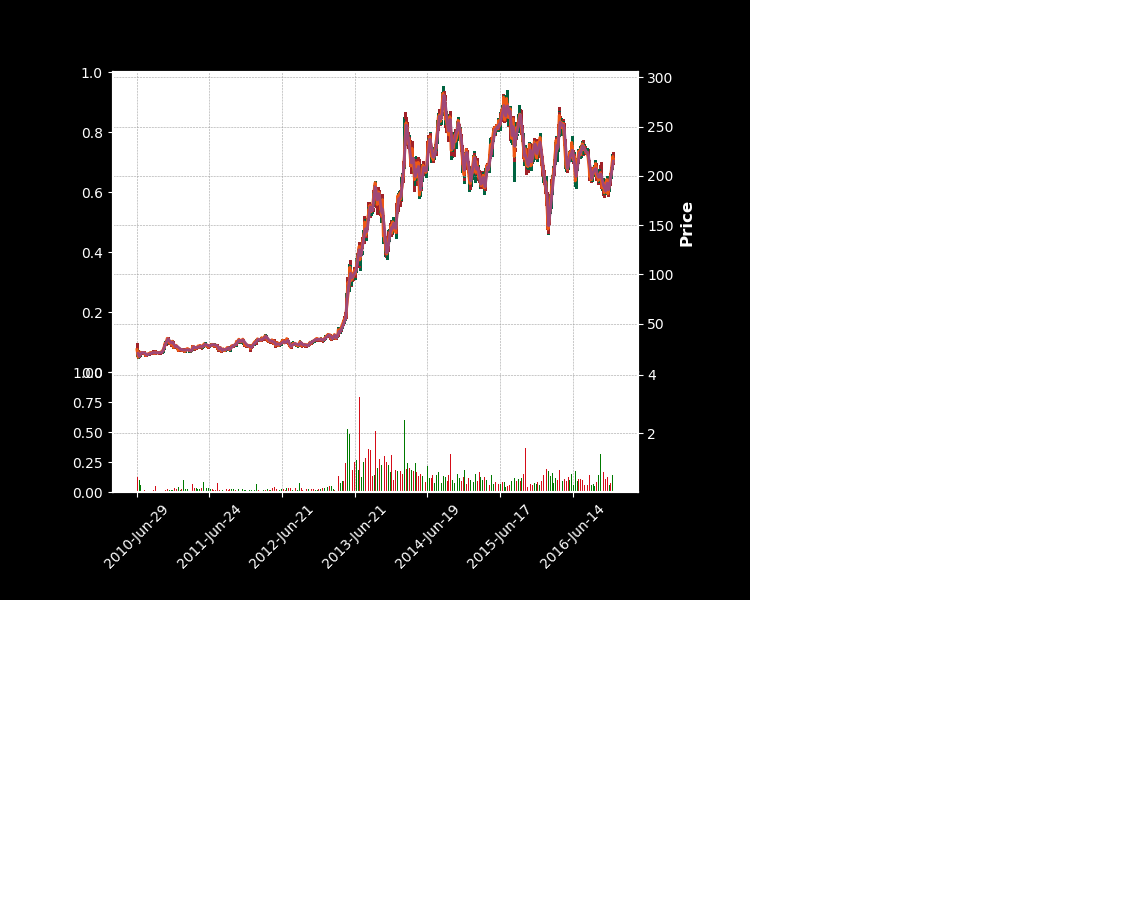

In [6]:
# First we set the kwargs that we will use for all of these examples:
kwargs = dict(type='candle',mav=(2,4,6),volume=True,figratio=(10,8),figscale=0.75)
mpf.plot(df,**kwargs,style='charles')# open high low close candel

In [7]:
resp=requests.get('https://www.slickcharts.com/sp500')
soup=bs.BeautifulSoup(resp.text)
table=soup.find('table',{'class':'table table-hover table-borderless table-sm'})
tickers=[]
for raw in table.findAll('tr')[1:]:
    ticker=raw.findAll('td')[2].text
    tickers.append(ticker)
   

with open("sp.pickle","wb") as f:
    pickle.dump(tickers,f)  

In [9]:
 if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

In [22]:
tickers2 = [w.replace('.', '-') for w in tickers]# datareader have prob with . so it replace by -
for ticker in tickers2[:170]:
        # just in case your connection breaks, we'd like to save our progress!
        

        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            pf=web.DataReader(ticker,'yahoo', start, end)
            #pf.reset_index(inplace=True)
            #pf.reset_index(inplace=True)
            #pf.set_index("Date", inplace=True)
            #df = pf.drop("Symbol", axis=1)
            pf.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

Already have MSFT
Already have AAPL
Already have AMZN
Already have FB
Already have GOOGL
Already have GOOG
Already have JNJ
Already have BRK-B
Already have V
Already have JPM
Already have UNH
Already have PG
Already have INTC
Already have MA
Already have HD
Already have T
Already have VZ
Already have DIS
Already have NVDA
Already have PFE
Already have MRK
Already have BAC
Already have XOM
Already have CSCO
Already have ADBE
Already have NFLX
Already have PEP
Already have CMCSA
Already have KO
Already have CVX
Already have WMT
Already have PYPL
Already have ABBV
Already have ABT
Already have CRM
Already have BMY
Already have MCD
Already have COST
Already have TMO
Already have AMGN
Already have MDT
Already have LLY
Already have ACN
Already have NKE
Already have UNP
Already have NEE
Already have ORCL
Already have PM
Already have AVGO
Already have TXN
Already have AMT
Already have IBM
Already have C
Already have LIN
Already have HON
Already have WFC
Already have DHR
Already have LOW
Alread

In [38]:
files=[file for file in os.listdir('C:/Users/Dhifaf/stock_dfs')]

In [63]:
#we are going to merge all files in one file
main_pf=[]
for file in files:
    pf=pd.read_csv(r'C:/Users/Dhifaf/stock_dfs/'+file)
   
    pf.set_index('Date',inplace=True)
    ticker=file[:-4]
    pf.drop(['Open','High','Low','Close','Volume'], 1,inplace=True)
    pf.rename(columns={'Adj Close': ticker}, inplace=True)
    if len(main_pf)==0:
            main_pf = pf
    else:
            main_pf = main_pf.join(pf, how='outer')
  

AAPL
ABBV
ABT
ACN
ADBE
ADI
ADP
ADSK
AEP
ALL
AMAT
AMD
AMGN
AMT
AMZN
ANTM
AON
APD
ATVI
AVGO
AXP
BA
BAC
BAX
BDX
BIIB
BK
BKNG
BLK
BMY
BRK-B
BSX
C
CAT
CB
CCI
CHTR
CI
CL
CMCSA
CME
CNC
COF
COP
COST
CRM
CSCO
CSX
CTSH
CVS
CVX
D
DD
DE
DG
DHR
DIS
DLR
DUK
DXCM
EA
EBAY
ECL
EL
EMR
EOG
EQIX
ETN
EW
EXC
FB
FDX
FIS
FISV
GD
GE
GILD
GIS
GM
GOOG
GOOGL
GPN
GS
HCA
HD
HON
HUM
IBM
ICE
ILMN
INTC
INTU
ISRG
ITW
JNJ
JPM
KMB
KMI
KO
LHX
LIN
LLY
LMT
LOW
LRCX
MA
MCD
MCO
MDLZ
MDT
MMC
MMM
MO
MRK
MS
MSFT
MU
NEE
NEM
NFLX
NKE
NOC
NOW
NSC
NVDA
ORCL
ORLY
PEP
PFE
PG
PGR
PLD
PM
PNC
PSX
PYPL
QCOM
REGN
ROP
ROST
RTX
SBAC
SBUX
SCHW
SHW
SO
SPGI
SRE
STZ
SYK
T
TFC
TGT
TJX
TMO
TMUS
TXN
UNH
UNP
UPS
USB
V
VRTX
VZ
WBA
WFC
WM
WMT
XEL
XOM
ZTS


In [64]:
 main_pf.to_csv('sp500_joined_closes.csv')

In [70]:
correlation_table=main_pf.corr()


<IPython.core.display.Javascript object>


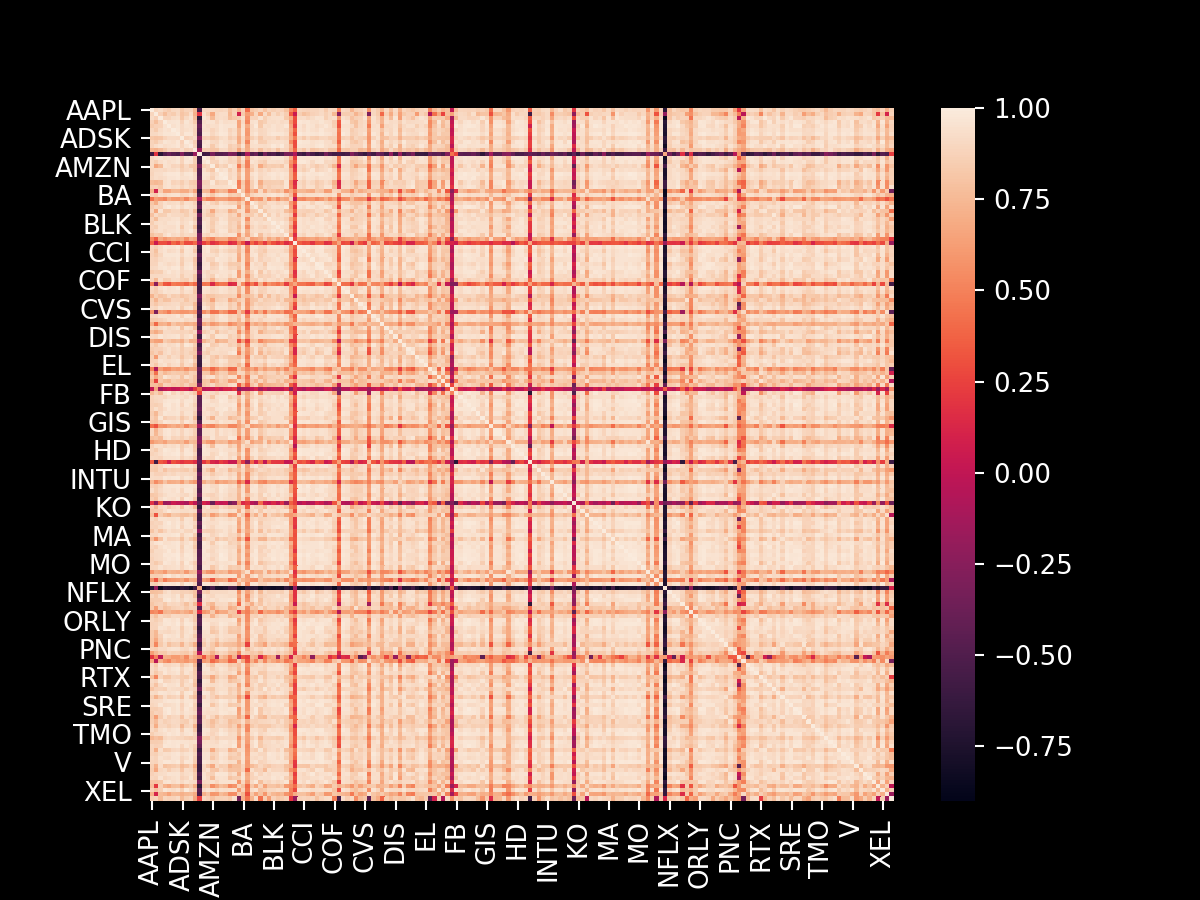

In [73]:
sns.heatmap(correlation_table)

In [79]:
def proc_lable(ticker):
    days=7
    tickers=main_pf.columns.values.tolist()
    main_pf.fillna(0,inplace=True)
    for i in range(1,days+1):
        main_pf['{}_{}'.format(ticker,i)]=(main_pf[ticker].shift(-1)-main_pf[ticker])/main_pf[ticker]
        main_pf.fillna(0,inplace=True)
        return main_pf,tickers
        
        
        
       

(                  AAPL       ABBV        ABT         ACN        ADBE  \
 Date                                                                   
 2000-01-03    3.460857   0.000000   0.000000    0.000000    0.000000   
 2000-01-04    3.169071   0.000000   0.000000    0.000000    0.000000   
 2000-01-05    3.215448   0.000000   0.000000    0.000000    0.000000   
 2000-01-06    2.937188   0.000000   0.000000    0.000000    0.000000   
 2000-01-07    3.076317   0.000000   0.000000    0.000000    0.000000   
 ...                ...        ...        ...         ...         ...   
 2016-12-23  110.743988  52.492733  35.966644  110.777954  105.019997   
 2016-12-27  111.447319  52.627453  36.135155  110.843948  104.980003   
 2016-12-28  110.972122  52.433788  35.779430  109.957581  103.769997   
 2016-12-29  110.943588  52.821125  35.863670  110.334755  103.680000   
 2016-12-30  110.078697  52.728493  35.957298  110.447914  102.949997   
 
                   ADI        ADP       ADSK     

In [88]:
proc_lable('XOM')

(                  AAPL       ABBV        ABT         ACN        ADBE  \
 Date                                                                   
 2000-01-03    3.460857   0.000000   0.000000    0.000000    0.000000   
 2000-01-04    3.169071   0.000000   0.000000    0.000000    0.000000   
 2000-01-05    3.215448   0.000000   0.000000    0.000000    0.000000   
 2000-01-06    2.937188   0.000000   0.000000    0.000000    0.000000   
 2000-01-07    3.076317   0.000000   0.000000    0.000000    0.000000   
 ...                ...        ...        ...         ...         ...   
 2016-12-23  110.743988  52.492733  35.966644  110.777954  105.019997   
 2016-12-27  111.447319  52.627453  36.135155  110.843948  104.980003   
 2016-12-28  110.972122  52.433788  35.779430  109.957581  103.769997   
 2016-12-29  110.943588  52.821125  35.863670  110.334755  103.680000   
 2016-12-30  110.078697  52.728493  35.957298  110.447914  102.949997   
 
                   ADI        ADP       ADSK     

In [89]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [92]:
from collections import Counter
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                        *[df["{}_{}d".format(ticker, i)] for i in range(1, hm_days+1)] ))

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:',Counter(str_vals))
    
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X,y,df